**Exercise 1-1.** Load the image *dog.jpg* and compute the full **SVD**. Choose a rank
 $r < m$ and confirm that the matrix $U^*U$ is the $r \times r$ identity matrix. Now confirm that $UU^*$ is not the identity matrix. Compute the norm of the error between $UU^*$ and the $n \times n$ identity matrix as the rank $r$ varies from 1 to $n$ and plot the
 error.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# Cargar datos
dog  = Image.open(os.path.join("..","DATA", "dog.jpg"))

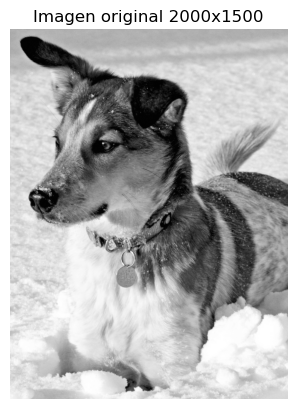

In [12]:
X = np.mean(dog, axis=-1)  
n,m = X.shape
plt.title(f'Imagen original {n}x{m}')
plt.axis('off')
plt.imshow(X, cmap='gray')

Error para r=50: 1.0561917572956356e-14


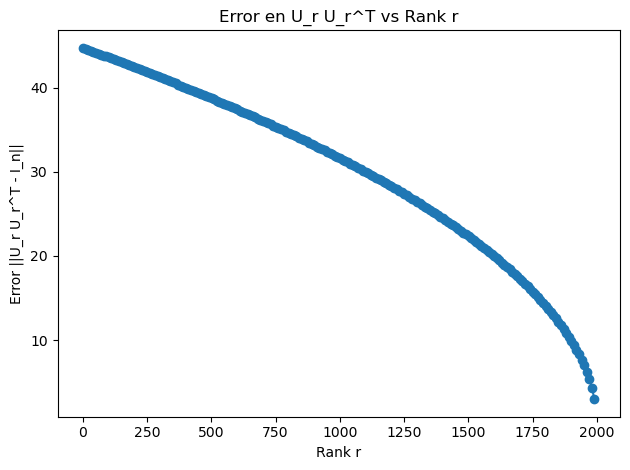

In [19]:
U, S, Vt = np.linalg.svd(X, full_matrices=True)

# Confirmar que U_r^T U_r es la identidad r x r


r = 50 
Ur = U[:, :r]
error = np.linalg.norm(Ur.T @ Ur - np.identity(r))
print(f"Error para r={r}: {error}")


# Confirmar que U_r U_r^T NO es la identidad n x n

errors_UUt = []

for r in range(1, n+1, 10):
    Ur = U[:, :r]
    error = np.linalg.norm(Ur @ Ur.T - np.identity(n))
    errors_UUt.append(error)

# graficar error
plt.figure()
plt.plot(range(1, n+1, 10), errors_UUt, marker='o')
plt.xlabel('Rank r')
plt.ylabel('Error ||U_r U_r^T - I_n||')
plt.title('Error en U_r U_r^T vs Rank r')
plt.tight_layout()
plt.show()